In [3]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core import time_evo_new
from core import load_param
from core import load_H_list
from core import load_result
from core import load_tlist
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians


We explore the process of thermalization in the ACL model. It is a model of unitary evolution involving a SHO and a large environment. Starting both in arbitrary state, we can expect both to evolve by interchanging energy until an equilibrium is reached.

A paper that explores the topic is **Equilibration and “Thermalization” in the Adapted Caldeira-Leggett model** by **Andreas Albrecht**

We start the system in a coherent state and the environment in an energy eigenstate. 

Going from the form of the model,
$$H = [{\color{ForestGreen}E_s} \otimes diag(i)\otimes id(d_2) + {\color{ForestGreen}E_{s2}} \otimes id(d_1)\otimes id(d_2) ] + [{\color{ForestGreen}(E_{int\_ s}} \otimes offdiag(\sqrt{i}) + {\color{ForestGreen}E_{int\_ s2}} \otimes diag(i)) \otimes ({\color{ForestGreen}E_{int\_ e}} \otimes rd(d_2) + {\color{ForestGreen}E_{int\_ e2}} \otimes id(d_2))] + [id(d_1) \otimes ({\color{ForestGreen}E_e} \otimes H_{e\_ self} + {\color{ForestGreen}E_{e2}} \otimes id(d_2))]$$


In [2]:
file_name="ACL_eq_1"
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [3]:
eigen = eig(H_list)

/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


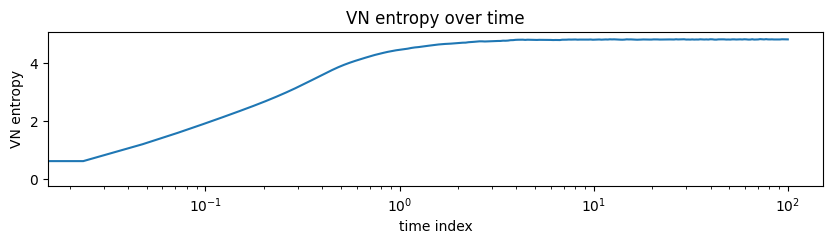

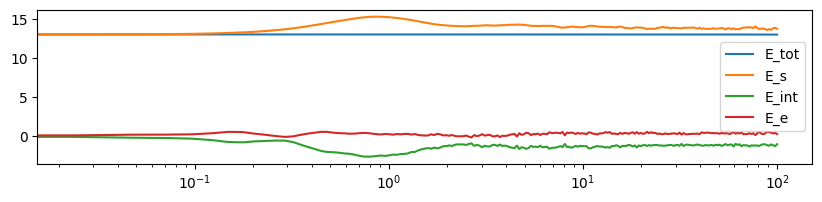

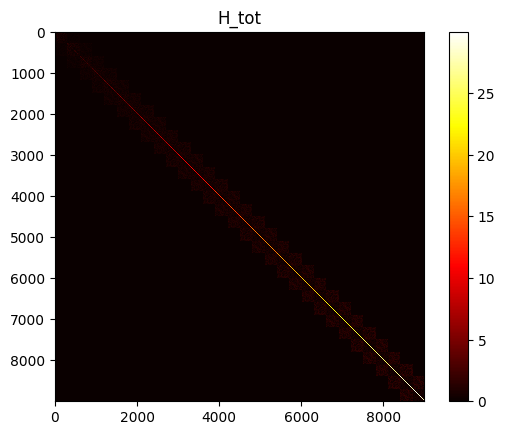

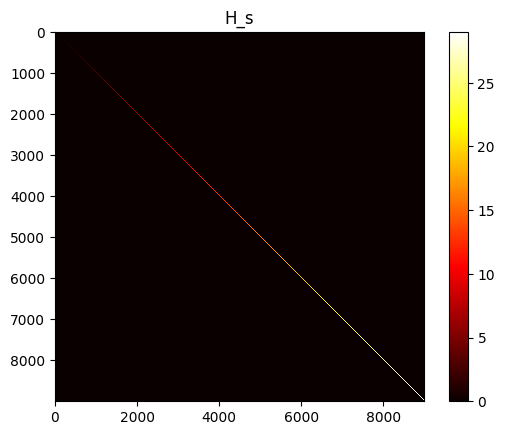

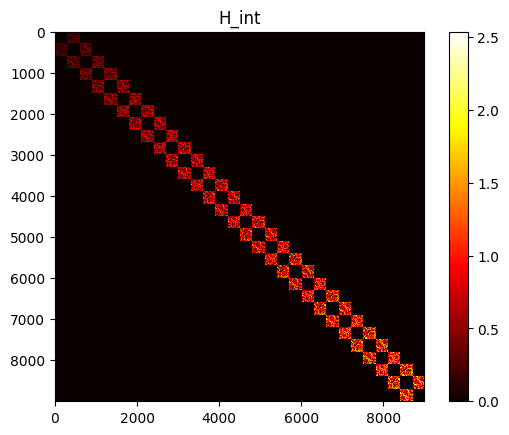

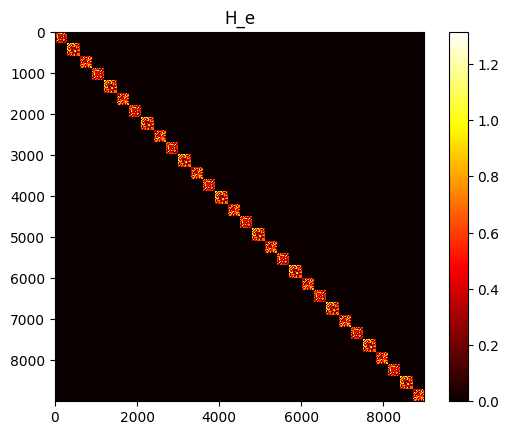

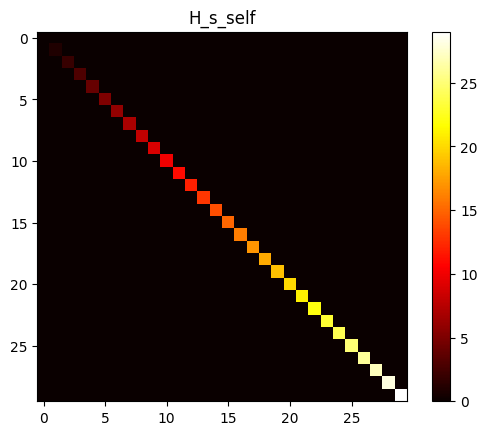

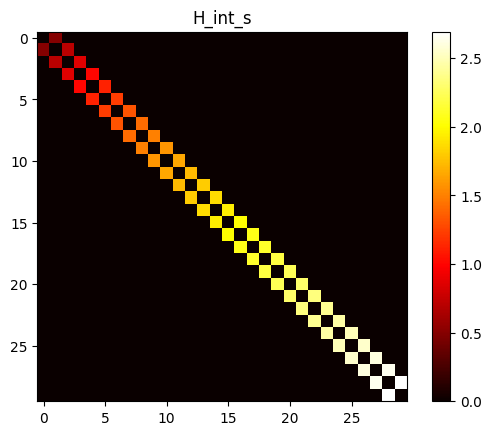

In [4]:
plot_VN(result,tlist,1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)

In [5]:
file_name="ACL_eq_2"
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [6]:
eigen = eig(H_list)

/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


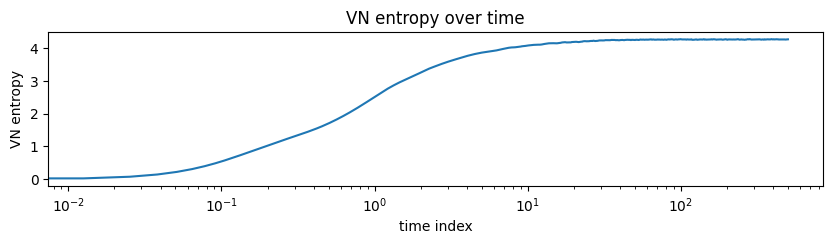

In [12]:
plot_VN(result,tlist,1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)

plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)


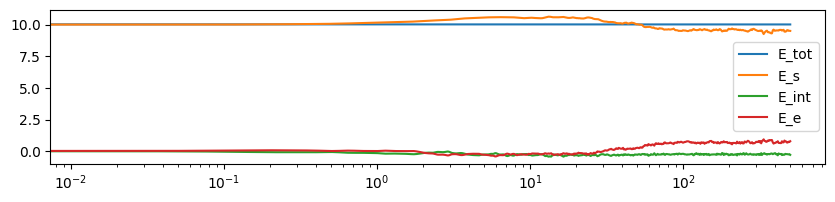

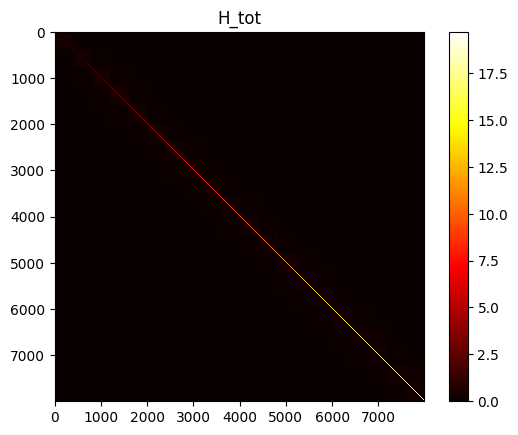

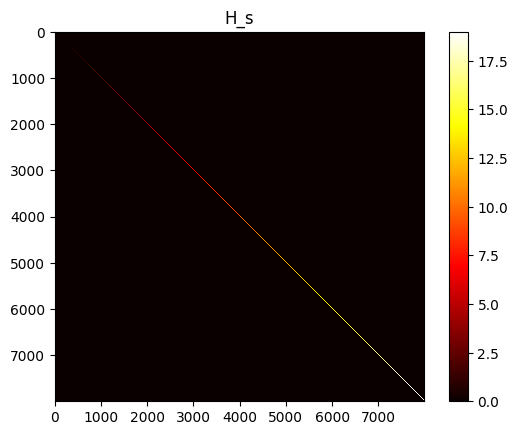

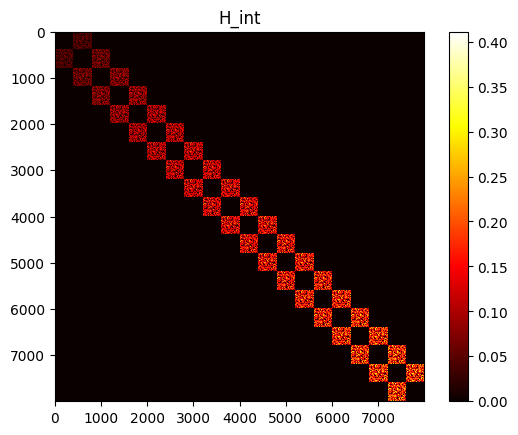

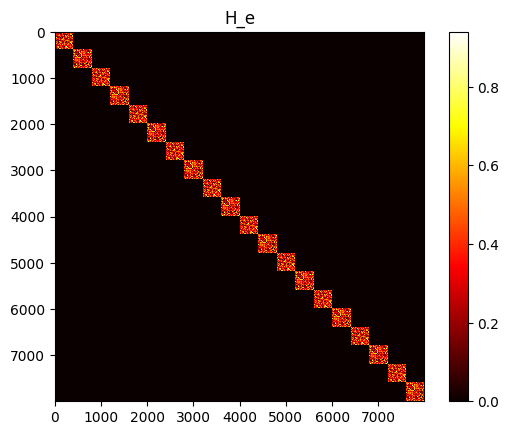

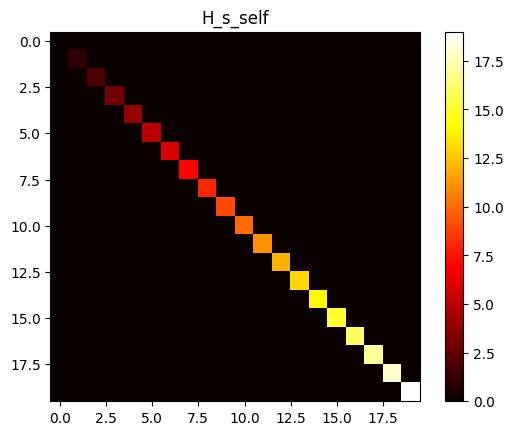

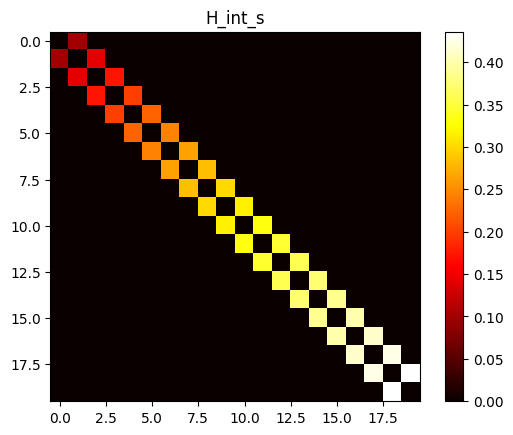

In [4]:
file_name="ACL_eq_3"
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [5]:
eigen = eig(H_list)

/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


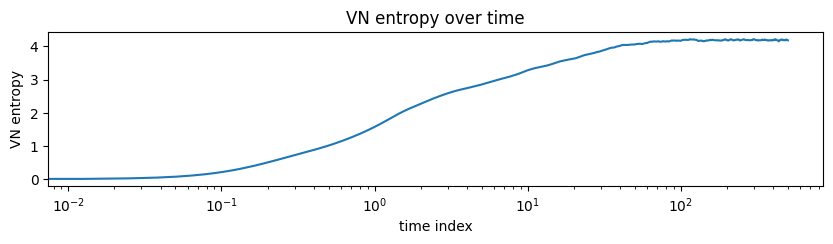

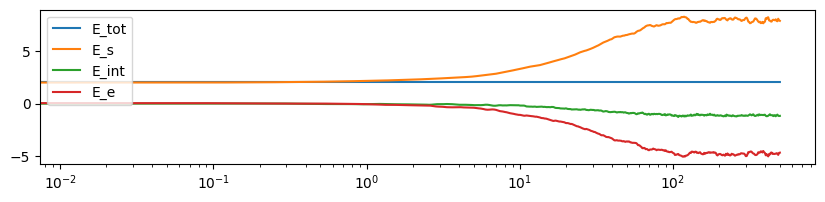

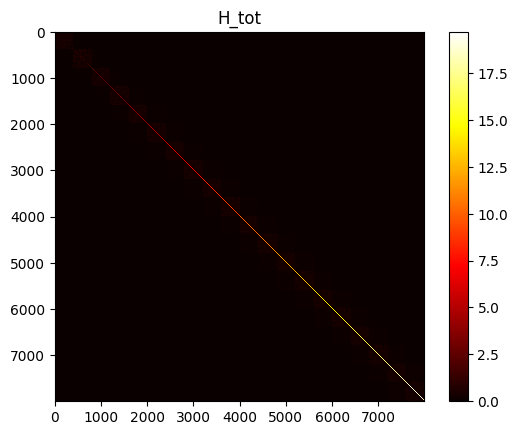

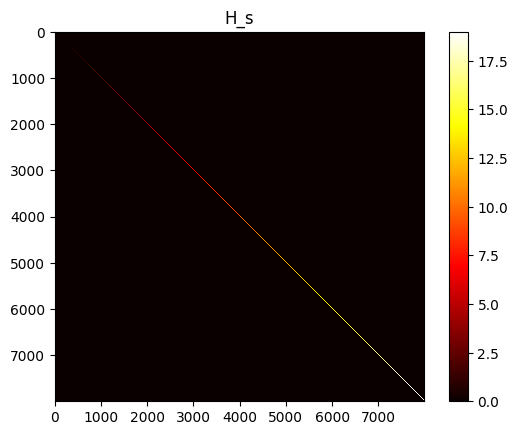

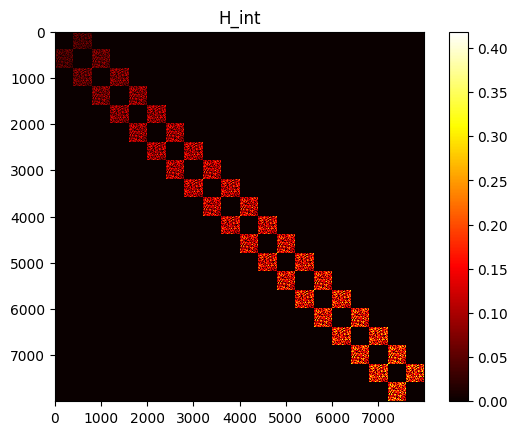

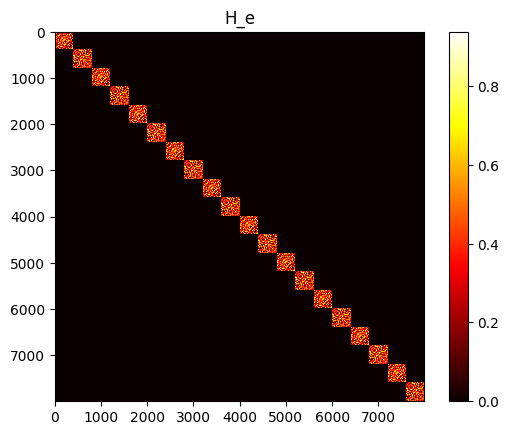

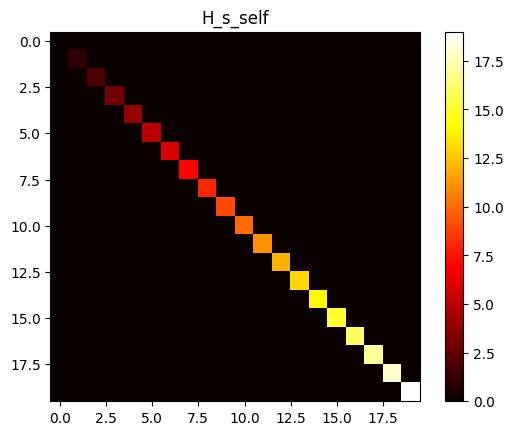

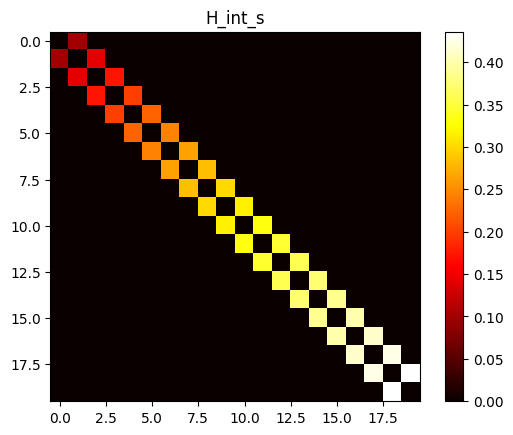

In [7]:
plot_VN(result,tlist,1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)

In [8]:
file_name="ACL_eq_4"
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [9]:
eigen = eig(H_list)

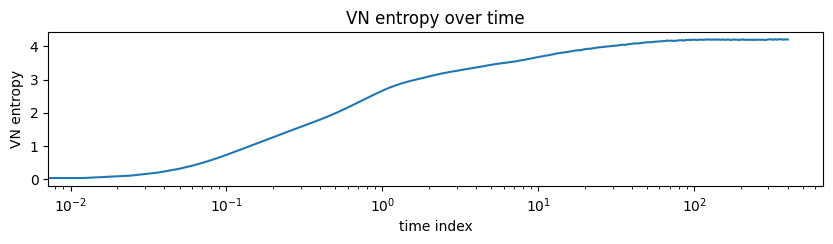

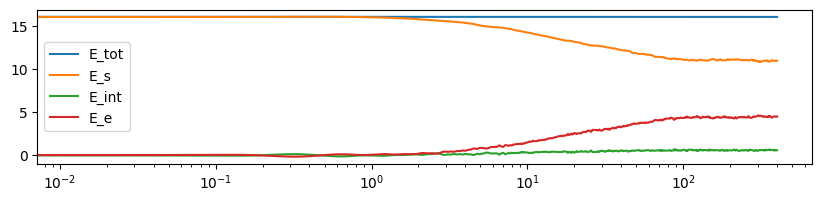

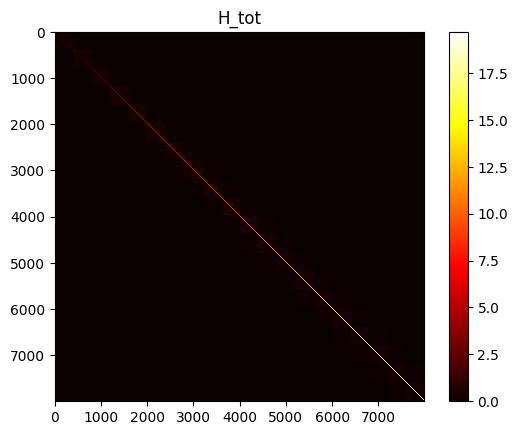

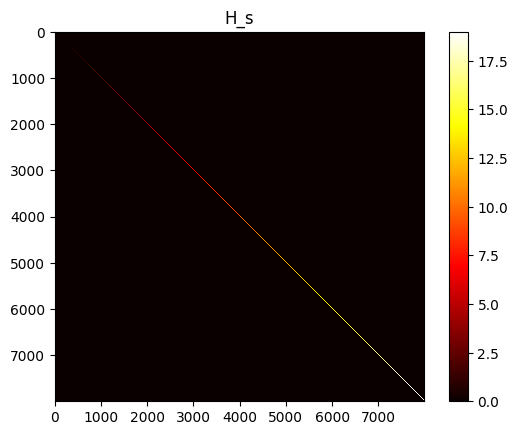

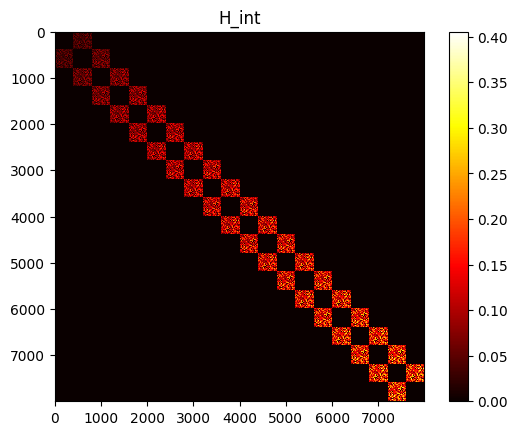

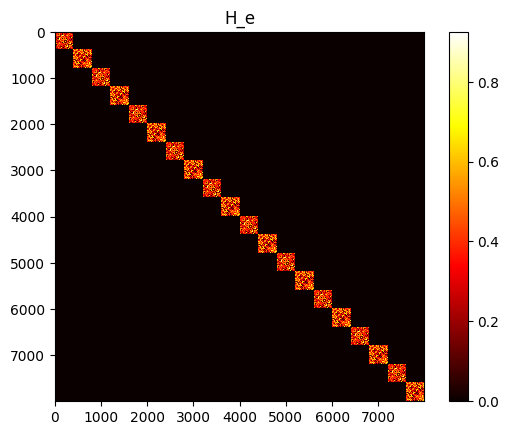

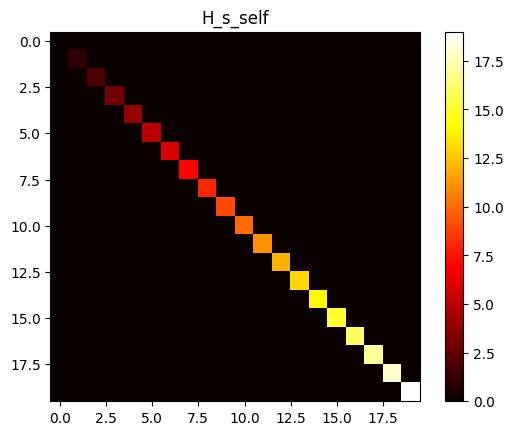

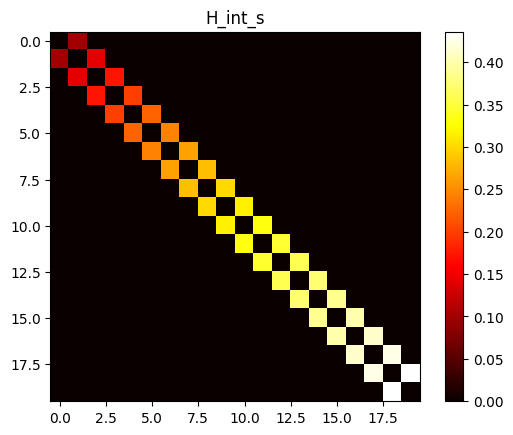

In [10]:
plot_VN(result,tlist,1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)

In [11]:
file_name="ACL_eq_5"
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [12]:
eigen = eig(H_list)

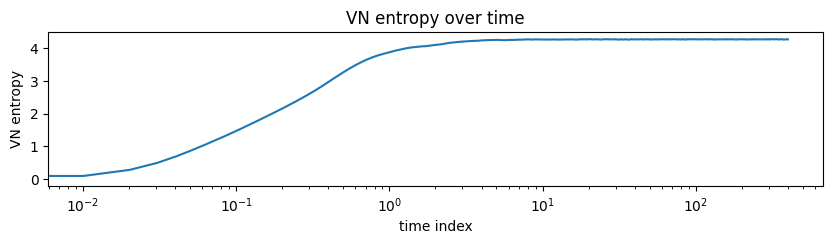

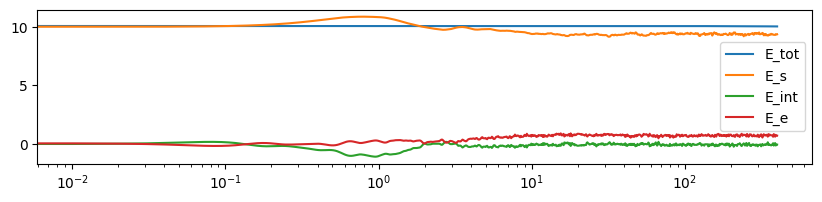

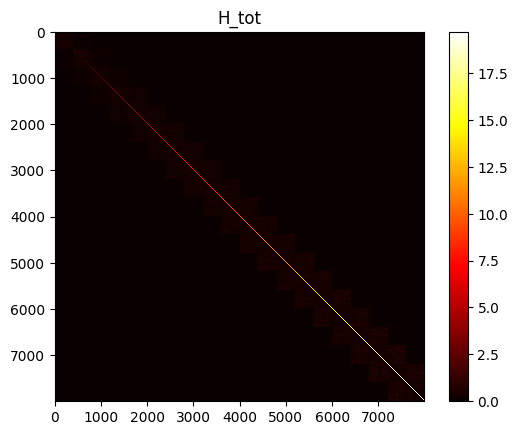

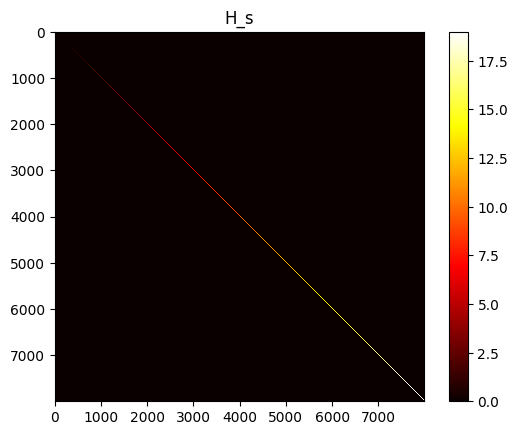

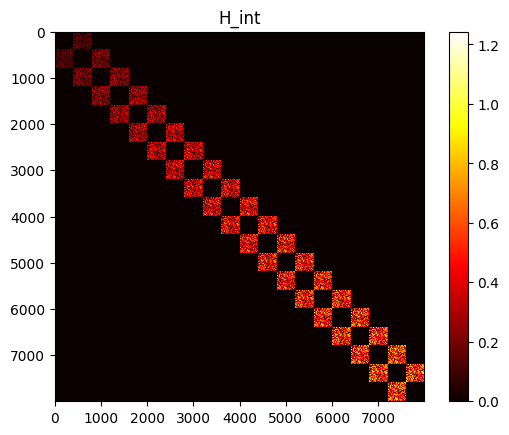

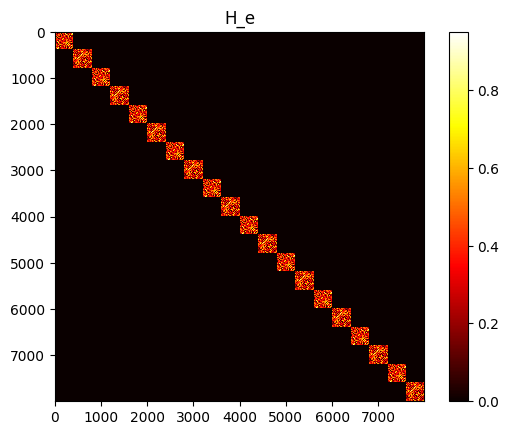

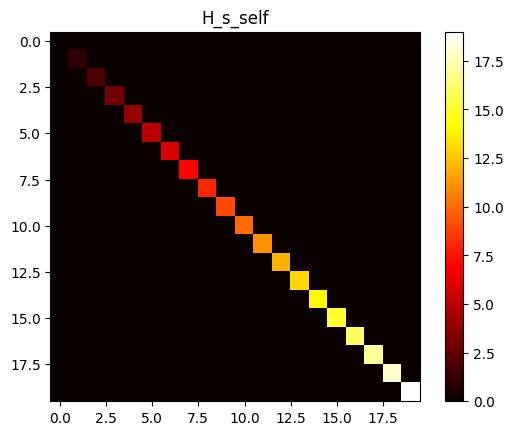

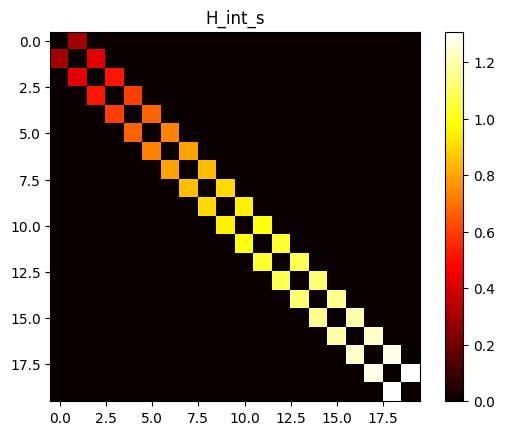

In [13]:
plot_VN(result,tlist,1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)

/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


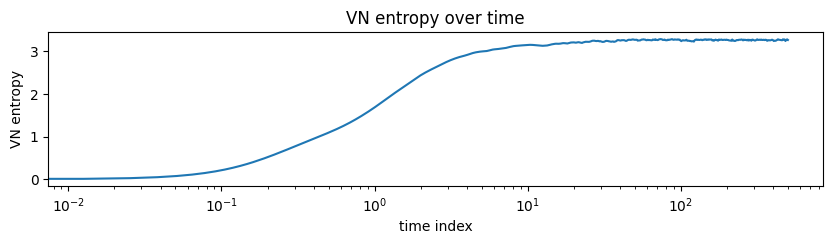

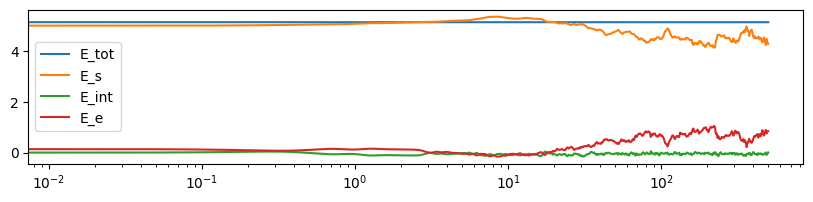

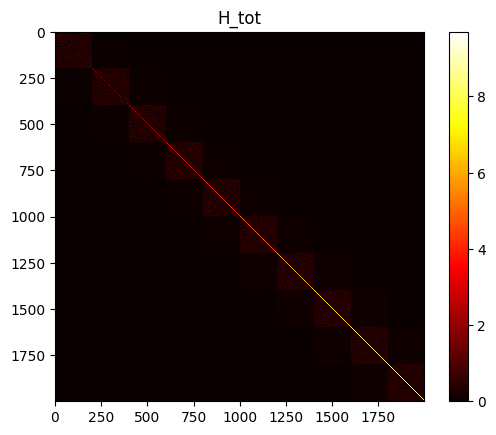

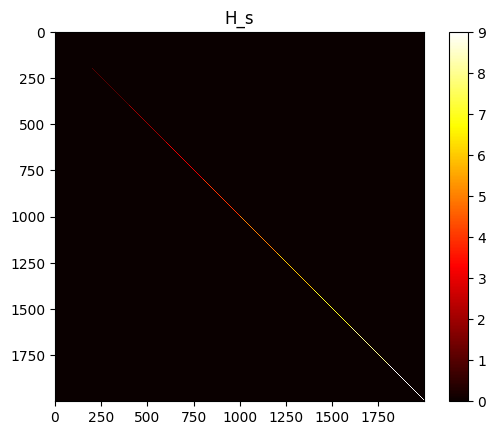

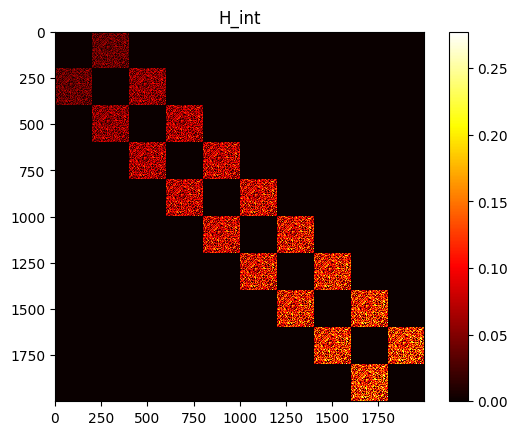

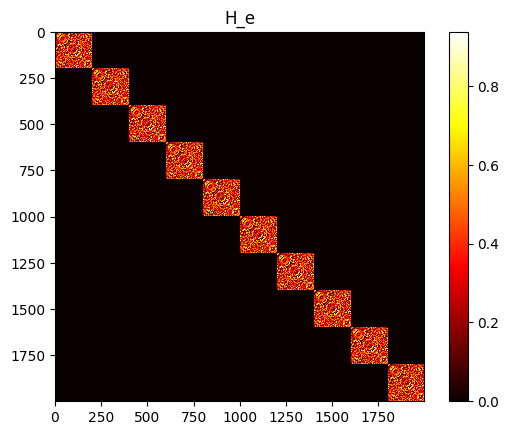

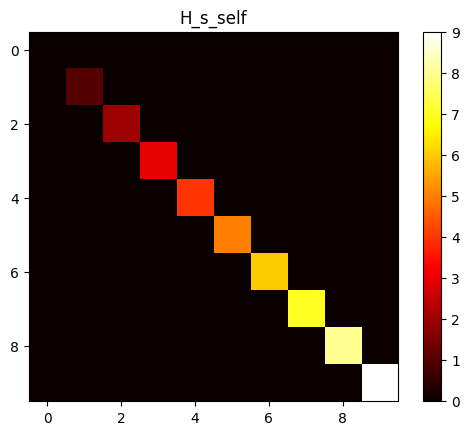

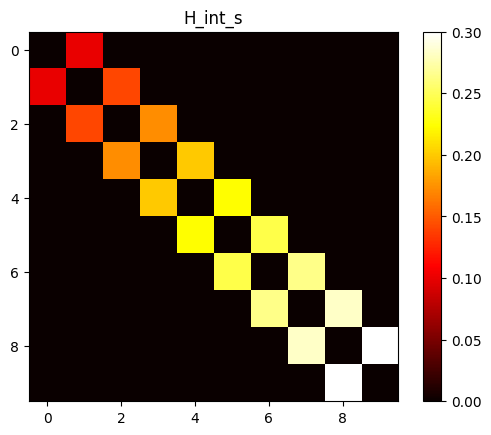

In [ ]:
d1=10;d2=200;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,0,0,0,1,0,0,0,0];envi=[0]; tmax= 500; ind_nb = 500;log=1

# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log)
eigen = eig(H_list)
plot_VN(result,info[15],1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)

the following one reproduces collapse with our simpler initial model.

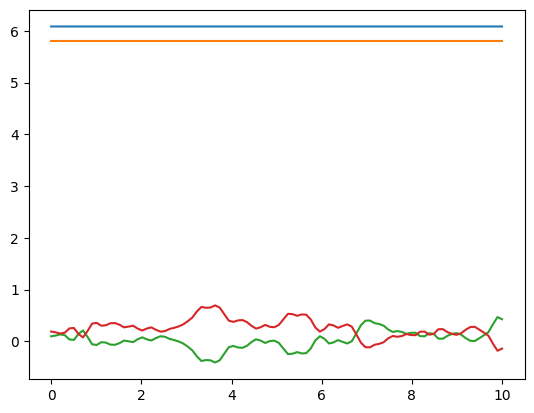

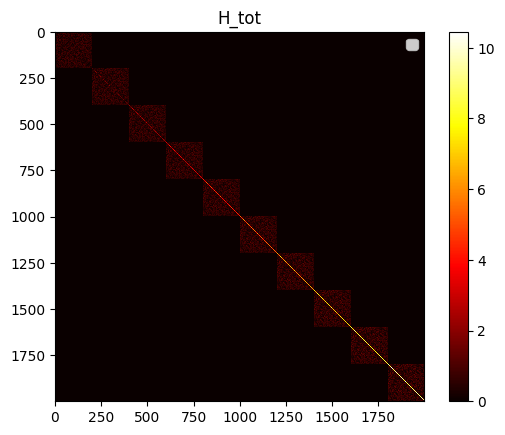

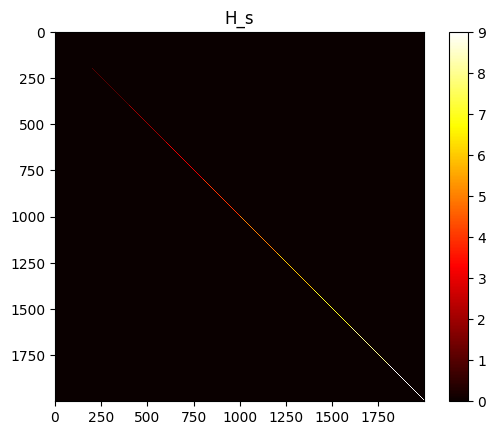

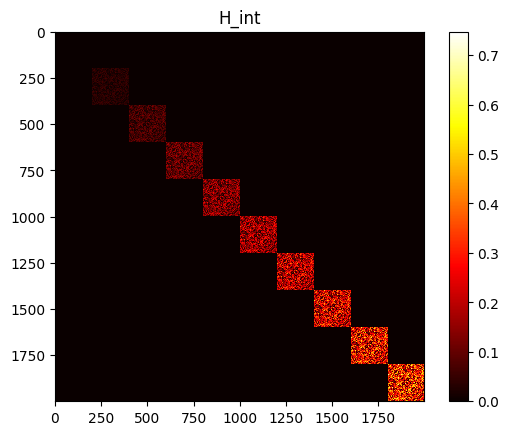

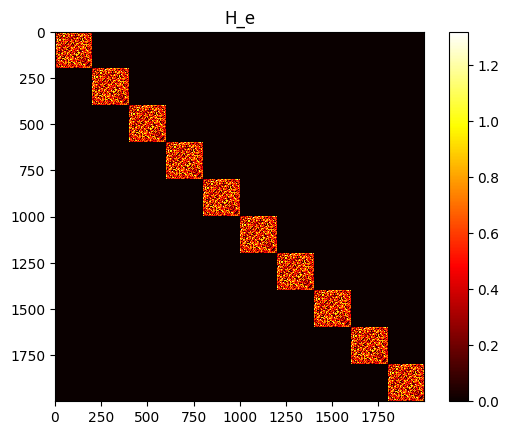

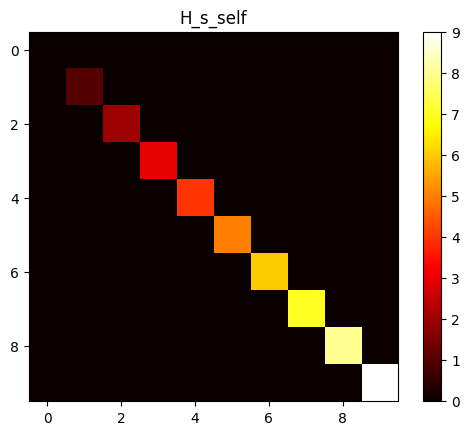

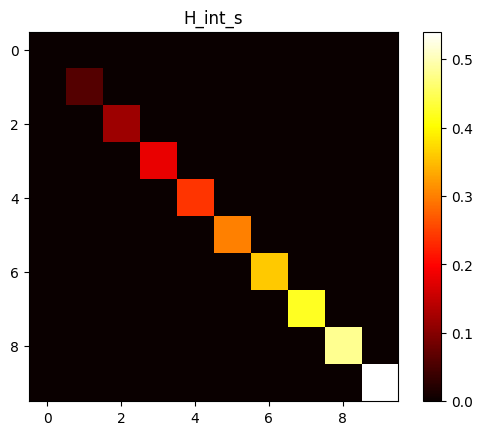

In [6]:
d1=10;d2=200;E_s=1; E_s2=0; E_int_s=0; E_int_e=1;E_int_s2=0.06;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0];envi=[0]; tmax= 10; ind_nb = 100;log=0

# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log)
eigen = eig(H_list)
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.show()
plt.legend(["E_tot","E_s","E_int","E_e"])
plot_hamiltonians(H_list)

So,to test thermalization I need to start my system in a coherent state + an enery eigenstate of the environment hamiltonian.
I may need tomodify the hamiltonians as well. because H_s = SHO, and qs = hamiltonian with position eigenstates.
Thisis not interesting yet because the system has no self interaction.